**A COMPREHENSIVE APPROACH TO REDUCING RESIDENTIAL BUILDING ENERGY USE**

Of the 97.4 quadrillion Btus of energy used by the United States in 2016, 21% of that usage could be attributed to residential building energy use and 19% could be attributed to commercial building energy use [1], as is shown in Figure 1 below. 

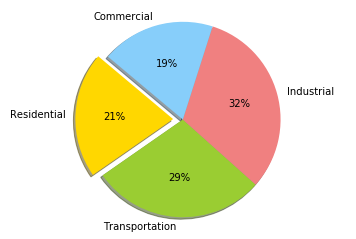

In [3]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Residential', 'Transportation', 'Industrial', 'Commercial'
sizes = [21, 29, 32, 19]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.0f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Thermodynamic law dictates that as the outdoor air temperature (OAT) decreases below 55F, the energy necessary to heat the building to a comfortable temperature will increase. Conversely, as the outdoor air temperature increases above 55F, the energy required to cool the building to a comfortable temperature will also increase. This can be seen in Figure 2 below.

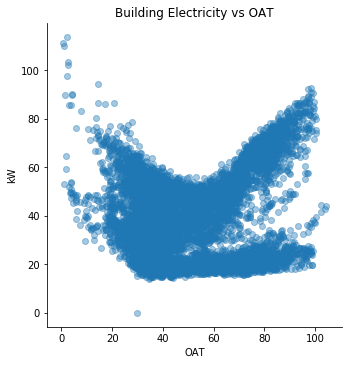

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('building60preoffice.csv')
OAT = df['OAT']
kW = df['Building 6 kW']
g = sns.lmplot(y='Building 6 kW', x='OAT',data=df, fit_reg=False,scatter_kws={'alpha':0.4})
g.set_ylabels("kW")
g.set_xlabels("OAT")
plt.title('Building Electricity vs OAT')
plt.show()

Building energy managers in commercial buidlings often use HVAC control strategies to reduce energy usage, such as:
1. Night setback - Modifying the space setpoint temperatures during unoccupied periods, thereby causing the space to be less comfortable during unoccupied periods (nights and weekends) such that less heating or cooling is necessary.
2. Optimimum start - Modifying the start time of the HVAC equipment such that it turns on as late as possible prior to the space being occupied while still meeting comfort requirements by the time the space is occupied.
3. Airside Economizer - Modifying the proportion of outside and return air during occupied periods to reduce the heating or cooling load. Specifically, this means decreasing the outside air percent when the OAT is very high or very low, and increasing it as the OAT approaches 55F.

The effectiveness of these strategies can be seen in the heat map in Figure 3 below, where the energy usage is greater during the day than at night.

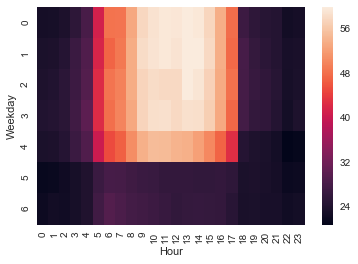

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
from pandas import *

df = pd.read_csv('building60preoffice.csv')
OccTime = pd.to_datetime(df['Date'])
OccWeekday = []
OccHour = []
kW = df['Building 6 kW']

#Fill empty arrays with weekday and time info only
for i in range(len(OccTime)):
    OccWeekday.append(OccTime[i].weekday())
    OccHour.append(OccTime[i].hour)

#Combine arrays into dataframe and average data
df2 = pd.DataFrame() 
df2['Weekday'] = pd.Series(OccWeekday, index=df.index)
df2['Hour'] = pd.Series(OccHour, index=df.index)
df2['kW'] = pd.Series(kW, index=df.index)
df3 = pivot_table(df2, values='kW', index=['Weekday'],columns=['Hour'], aggfunc=np.mean)

# Draw a heatmap with the numeric values in each cell
sns.set()
ax = sns.heatmap(df3)
plt.show()

Over time, equipment degradation and unauthorized modifications to these controls and setpoints can cause the building to operate poorly as compared to the building's original design. When this happens, buildings will often undergo a retro-commissioning process, during which time thorough analysis is performed to identify and resolve the sources of reduced building energy performance. Figure 4 below shows that after undergoing this process, a building's energy use was reduced for all OATs.

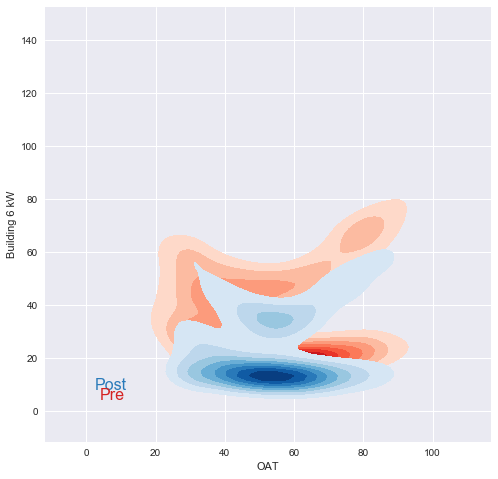

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

df_Pre = pd.read_csv('building60preoffice.csv')
OAT_Pre = df_Pre['OAT']
kW_Pre = df_Pre['Building 6 kW']

df_Post = pd.read_csv('building62postoffice.csv')
OAT_Post = df_Post['OAT']
kW_Post = df_Post['Building 6 kW']

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
#ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(OAT_Pre, kW_Pre,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(OAT_Post, kW_Post,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "Post", size=16, color=blue)
ax.text(3.8, 4.5, "Pre", size=16, color=red)
plt.show()

While building energy use in the commercial sector can be attributed to how well the building engineer/energy manager manages it, most occupants in residential dwelling units do not have sophisticated controls guiding the operation of their HVAC units, or the knowledge base necessary to know how to reduce their energy footprint while still maintaining comfort conditions. As a result, there may be sizeable opportunity for a reduction in residential building energy use. 

**RESEARCH EXPERIMENT: REDUCTION OF RESIDENTIAL BUILDING ENERGY USE THROUGH DAILY EMAIL GUIDANCE**

One potentially underutilized control strategy in residential dwelling units is the use of natural ventilation when the outdoor air temperatures are mild, and mechanical ventilation when OATs are more extreme. If residential occupants were given daily guidance via email regarding whether or not they should leave their windows open and turn off their HVAC, there may be potential to utilize this strategy.

Commander Fleet Activities Yokosuka (CFAY) is a naval base in Japan, which has 20 nine-story apartment complexes, 9 of which have 48 two-bedroom units and 11 of which have 68 three-bedroom units. Residents in these units have control over the thermostats and windows specific to their unit. Additionally, given the limited employment opportunities for spouses overseas, there is a greater likelihood that these spaces will be occupied during the day, meaning that the default strategy to outright shut off the units may not be feasible.

**1. EXPERIMENTAL HYPOTHESIS**

Hypothesis: Sending out a daily email to residential occupants and making recommendations as to which HVAC strategy to use will reduce residential building energy use. The recommendations will be guided by the weather forecast for the upcoming day, and will include whether to open windows or turn on their local HVAC units. This hypothesis is supported by the fact that this strategy has successfully been used in the commercial sector, albeit in the more sophisticated form of airside economizer. This is a low-tech control strategy equivalent to airside economizer in a commercial building.

Null Hypothesis: Sending out a daily email to residential occupants and making recommendations as to which HVAC strategy to use will not reduce residential building energy use.

**2. METHODS AND STRATEGY**

Given the identical layout and multiplicity of identical apartment complexes at CFAY, there is ample opportunity to perform an A/B test to verify the effectiveness this strategy.

A (Control) Group: No change to current operation, no communications extended. This applies to all but one (the treatment) of the apartment complexes.
B (Treatment) Group: Send out a daily email to all residents in 48 units of one apartment complex, guided by the weather forecast for the upcoming day. Specify:
* Windows: whether to leave open part of the day, the whole day, or leave closed all day.
* Time: Specify when to turn on HVAC, if applicable.
* Temperature: If HVAC is to be turned on, specify the ideal setpoints during the day.

This experiment should be performed for one month and assumes that the heating, cooling, and electricity usage is monitored on a per-unit basis.

**3. EVALUATION PLAN**

Monitor and log the hourly energy use (in kBtu/SF) per apartment unit for both the A  and B groups. Calculate the average energy use and perform a t-test on a sample of 10 of the units from each group. If p < 0.05, the experiment is considered to be successful.

**REFERENCES**

[1] "Data and Statistics - US Energy Facts Explained." US Energy Information Administration. https://www.eia.gov/energyexplained/?page=us_energy_home#tab3